In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import stockstats as sst
%matplotlib inline
sns.set(style = "darkgrid")

In [32]:
df = pd.read_csv("^IXIC.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13313 non-null  object 
 1   Open       13313 non-null  float64
 2   High       13313 non-null  float64
 3   Low        13313 non-null  float64
 4   Close      13313 non-null  float64
 5   Adj Close  13313 non-null  float64
 6   Volume     13313 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 728.2+ KB


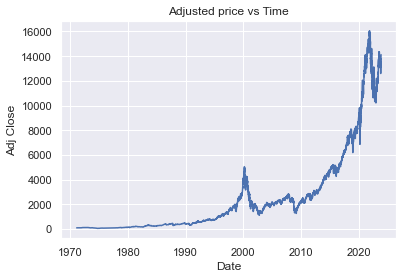

In [ ]:
sns.lineplot(data = df,x = "Date",y = "Adj Close")
plt.title("Adjusted price vs Time")
plt.savefig("Pictures/price_vs_time.png")

In [ ]:
# df.drop(columns=["Date"],inplace=True)

# df['month'] = df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,2,5,4
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,2,8,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,2,9,1
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,2,10,2
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,1971,2,11,3


In [ ]:
# Adds these features into a stockstats df
stock_df = sst.wrap(df)

# Makes a bunch of new features with stockstats
stock_df[["change", "rsi", "macd", "dma", "eribull","eribear"]]

stock_df.dropna(axis = 0, inplace= True)
stock_df.head()

,open,high,low,close,adj close,volume,year,month,day,day_of_week,change,rsi,macd,macds,macdh,dma,eribull,eribear
date,,,,,,,,,,,,,,,,,,
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,2,8,0,0.839996,100.000000,0.018846,0.010470,0.008376,0.0,0.719997,0.719997
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,2,9,1,-0.079328,90.698267,0.021533,0.015004,0.006529,0.0,0.548574,0.548574
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,2,10,2,-0.069472,83.388627,0.019700,0.016595,0.003105,0.0,0.410206,0.410206
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,1971,2,11,3,0.754787,91.447626,0.048531,0.026095,0.022436,0.0,1.003029,1.003029
1971-02-12,102.050003,102.050003,102.050003,102.050003,102.050003,0,1971,2,12,4,0.591430,93.945145,0.090607,0.043582,0.047026,0.0,1.374030,1.374030


In [ ]:
df = sst.unwrap(stock_df)
df.head()



,open,high,low,close,adj close,volume,year,month,day,day_of_week,change,rsi,macd,macds,macdh,dma,eribull,eribear
date,,,,,,,,,,,,,,,,,,
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,2,8,0,0.839996,100.000000,0.018846,0.010470,0.008376,0.0,0.719997,0.719997
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,2,9,1,-0.079328,90.698267,0.021533,0.015004,0.006529,0.0,0.548574,0.548574
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,2,10,2,-0.069472,83.388627,0.019700,0.016595,0.003105,0.0,0.410206,0.410206
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,1971,2,11,3,0.754787,91.447626,0.048531,0.026095,0.022436,0.0,1.003029,1.003029
1971-02-12,102.050003,102.050003,102.050003,102.050003,102.050003,0,1971,2,12,4,0.591430,93.945145,0.090607,0.043582,0.047026,0.0,1.374030,1.374030


In [39]:
stock_df = stock_df[["year","month","day","open","high","low","close","adj close","volume","day_of_week","change","rsi","macd","macds","macdh","dma","eribull","eribear"]]
stock_df.info()

stock_df.to_csv("featured_data.csv")

<class 'stockstats.StockDataFrame'>
DatetimeIndex: 13312 entries, 1971-02-08 to 2023-11-17
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         13312 non-null  int64  
 1   month        13312 non-null  int64  
 2   day          13312 non-null  int64  
 3   open         13312 non-null  float64
 4   high         13312 non-null  float64
 5   low          13312 non-null  float64
 6   close        13312 non-null  float64
 7   adj close    13312 non-null  float64
 8   volume       13312 non-null  int64  
 9   day_of_week  13312 non-null  int64  
 10  change       13312 non-null  float64
 11  rsi          13312 non-null  float64
 12  macd         13312 non-null  float64
 13  macds        13312 non-null  float64
 14  macdh        13312 non-null  float64
 15  dma          13312 non-null  float64
 16  eribull      13312 non-null  float64
 17  eribear      13312 non-null  float64
dtypes: float64(13), int64(5)
memory

In [34]:
# print(df.columns.tolist())
# new_order = ["date",'open', 'high', 'low', 'close', 'adj close', 'volume', 'year', 'month', 'day', 'day_of_week', 'change', 'rsi', 'macd', 'macds', 'macdh', 'dma', 'eribull', 'eribear']
# df = df[new_order]
# print(df.columns.tolist())

df['Date'] = pd.to_datetime(df['Date'])


df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df["day_of_week"] = df['Date'].dt.day_of_week

df.info()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


KeyError: "None of [Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'year', 'month',\n       'day', 'day_of_week', 'change', 'rsi', 'macd', 'macds', 'macdh', 'dma',\n       'eribull', 'eribear'],\n      dtype='object')] are in the [columns]"